## Оглавление
1. [Загрузка данных](#Шаг_1)
2. [Умножение матриц](#Шаг_2)
3. [Алгоритм преобразования](#Шаг_3)
4. [Проверка алгоритма](#Шаг_4)

<a name="Шаг_1"></a>

## 1. Загрузка данных

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
data = pd.read_csv('insurance.csv')

In [7]:
def info(data):
    column = list(data.columns)
    for i in column:
        plt.title(i)
        plt.hist(data[i])
        plt.show()
        display(data[i].describe())

In [8]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


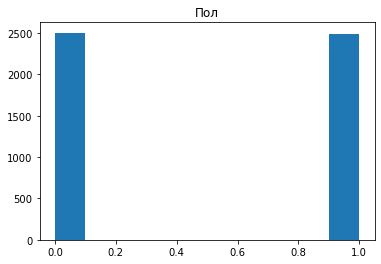

count    5000.000000
mean        0.499000
std         0.500049
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Пол, dtype: float64

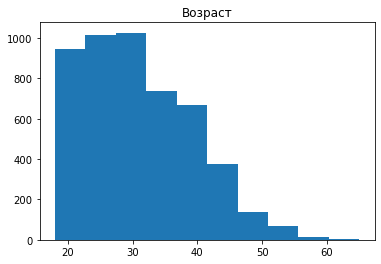

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64

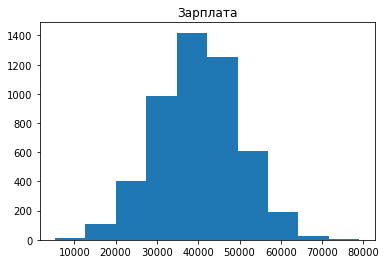

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

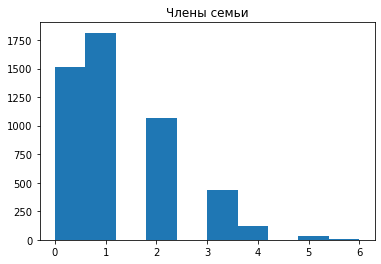

count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Члены семьи, dtype: float64

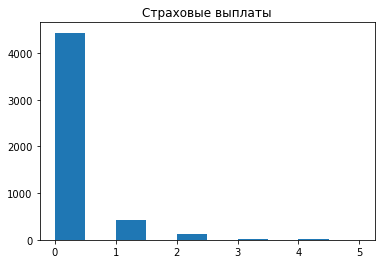

count    5000.000000
mean        0.148000
std         0.463183
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Страховые выплаты, dtype: float64

In [9]:
info(data)

Норальное распределение только по зарплате

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [11]:
data['Возраст'] = data['Возраст'].astype('int')

In [12]:
data['Зарплата'] = data['Зарплата'].astype('int')

Сменил тип float на int. Так как Возраст интересует только по полным прожитым годам. По поводу зарплат стоит отметить, что страховые выплаты изначально били тип int, следовательно если выплаты в целых числах, то стоит указавать зарплату так же в целых числах.

In [13]:
data[data['Члены семьи'] == 0]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2,0,29,21000,0,0
4,1,28,26100,0,0
11,1,38,29300,0,0
13,0,21,55000,0,0
15,1,34,23300,0,0
...,...,...,...,...,...
4978,0,35,13400,0,0
4981,1,26,39800,0,0
4985,1,38,45800,0,0
4992,0,45,54600,0,1


Считаю, что страхователь не относится к членам семьи(

[Home](#Оглавление)

<a name="Шаг_2"></a>

## 2. Умножение матриц

#### Линейная регрессия из sklearn

In [14]:
features = data.drop(['Страховые выплаты'], axis = 1)

In [15]:
target = data['Страховые выплаты']

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [17]:
model = LinearRegression()

In [18]:
model.fit(features_train, target_train)

LinearRegression()

In [19]:
predict = model.predict(features_valid)

In [20]:
r2_score(target_valid, predict)

0.43522756840832544

Эффективность предсказания низка.

In [21]:
features_array = features.values

Признаки перевел в матрицу

In [22]:
target_array = target.values

Цель в вектор

In [23]:
features_train_array, features_valid_array, target_train_array, target_valid_array = train_test_split(
    features_array, target_array, test_size=0.25, random_state=12345)

In [24]:
factor = np.random.randint(0, 10, (features_train_array.shape[1], features_train_array.shape[1]))

In [25]:
factor = np.linalg.inv(factor)

In [26]:
features_train_array = features_train_array.dot(factor)

In [27]:
features_valid_array = features_valid_array.dot(factor)

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

In [28]:
model_array = LinearRegression()

In [29]:
model_array.fit(features_train_array, target_train_array)

LinearRegression()

In [30]:
predict_array = model_array.predict(features_valid_array)

In [31]:
r2_score(target_valid_array, predict_array)

0.43522756840790155

#### Линейная регрессия

In [32]:
features_self = data.drop(['Страховые выплаты'], axis = 1)

In [33]:
target_self = data['Страховые выплаты']

In [34]:
features_train_self, features_valid_self, target_train_self, target_valid_self = train_test_split(
    features_self, target_self, test_size=0.25, random_state=12345)

In [35]:
class LinearRegression_self:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [36]:
model_self = LinearRegression_self()

In [37]:
model_self.fit(features_train_self, target_train_self)

In [38]:
predictions_self = model_self.predict(features_valid_self)

In [39]:
r2_score(target_valid_self, predictions_self)

0.43522756840833376

#### Линейная регрессия с преобразованными признаками

In [40]:
features_self = data.drop(['Страховые выплаты'], axis = 1)

In [41]:
target_self = data['Страховые выплаты']

In [42]:
factor_self = np.random.randint(0, 10, (features_self.shape[1], features_self.shape[1]))

In [43]:
factor_self_inv = np.linalg.inv(factor_self)

In [44]:
factor_self_inv

array([[-0.01960784,  0.11764706,  0.31372549, -0.19607843],
       [ 1.07843137,  0.52941176,  0.74509804, -1.21568627],
       [ 0.43137255, -0.08823529,  0.09803922, -0.18627451],
       [-1.25490196, -0.47058824, -0.92156863,  1.45098039]])

Матрица обратима

In [45]:
features_self = features_self.dot(factor_self)

In [46]:
features_train_self, features_valid_self, target_train_self, target_valid_self = train_test_split(
    features_self, target_self, test_size=0.25, random_state=12345)

In [47]:
class LinearRegression_self:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [48]:
model_self = LinearRegression_self()

In [49]:
model_self.fit(features_train_self, target_train_self)

In [50]:
predictions_self = model_self.predict(features_valid_self)

In [51]:
r2_score(target_valid_self, predictions_self)

0.43522746428290504

[Home](#Оглавление)

<a name="Шаг_3"></a>

## 3. Алгоритм преобразования

**Алгоритм**



In [52]:
def algorithm(data):
    features = data.drop(['Страховые выплаты'], axis = 1)
    target = data['Страховые выплаты']
    features = features.values
    target = target.values  
    P = np.random.randint(0, 10, (features.shape[1], features.shape[1]))
    X = features.dot(P)
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)
    display('Метрика r2 без преобразования')
    display(r2_score(target_valid, predict))
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    X, target, test_size=0.25, random_state=12345)
    
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)
    display('Метрика r2 с преобразованием')
    display(r2_score(target_valid, predict))

Без функции

In [53]:
features = data.drop(['Страховые выплаты'], axis = 1)

In [54]:
target = data['Страховые выплаты']

Отделил целевой признак

In [55]:
features = features.values

In [56]:
target = target.values

Преобразовал в вектор

In [57]:
P = np.random.randint(0, 10, (features.shape[1], features.shape[1]))

In [58]:
np.linalg.inv(P)

array([[-0.09125607,  0.08188758,  0.08570437, -0.07113116],
       [ 0.07702984, -0.08813324,  0.06453851,  0.06384455],
       [ 0.11762665,  0.14920194, -0.14469119, -0.1592644 ],
       [-0.09507287, -0.01734906,  0.02845246,  0.14642609]])

Возьмем случайную обратимую матрицу.

In [59]:
X = features.dot(P)

In [60]:
X

array([[347447, 397060,  49937,  49980],
       [266276, 304281,  38372,  38423],
       [147174, 168174,  21232,  21261],
       ...,
       [237420, 271330,  34068,  34098],
       [229033, 261756,  32893,  32927],
       [284369, 324982,  40833,  40863]], dtype=int64)

В таком виде не представляется возможным как - то понять какие данные несет матрица.

In [61]:
features_train, features_valid, target_train, target_valid = train_test_split(
    X, target, test_size=0.25, random_state=12345)

In [62]:
model = LinearRegression()

In [63]:
model.fit(features_train, target_train)

LinearRegression()

In [64]:
predict = model.predict(features_valid)

In [65]:
r2_score(target_valid, predict)

0.4352275684083391

**Обоснование**

При умножение признаов теряется возможность расшифровки данных.

[Home](#Оглавление)

<a name="Шаг_4"></a>

## 4. Проверка алгоритма

In [66]:
algorithm(data)

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.4352275684083379

In [67]:
i = 5

In [68]:
while i > 0:
    algorithm(data)
    i -= 1

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.4352275684091854

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.43522756840833987

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.435227568408036

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.4352275684083242

'Метрика r2 без преобразования'

0.43522756840832544

'Метрика r2 с преобразованием'

0.43522756840830445

проверил несколько раз с преобразованием и без

[Home](#Оглавление)